# Neural Network - Single Neuron Network


## Single Neuron Without Activation Function

As discussed [here](https://github.com/pooyavahidi/content/blob/main/ai/neural_networks.md), a neural network with single neuron without activation function is equivalent to a linear regression model as the output of the model is the output of the linear transformation of the input (logit) without any activation function (non-linearity). More on that [here](https://github.com/pooyavahidi/content/blob/main/ai/neural_networks.md#neural-network-with-one-neuron)



In the following we create a simple linear dataset with predefined weights and bias and then compare the plot of the linear regression model with the plot of the neural network model with single neuron without activation function.

$$f_{\vec{\mathbf{w}}, b}(\vec{\mathbf{x}}^{(i)}) = \vec{\mathbf{w}} \cdot \vec{\mathbf{x}}^{(i)} + b$$

In this example, we have one feature with the predefined weight of 3 and bias of 2.

$$f_{3,2}(x^{(i)}) = 3x^{(i)} + 2$$


Let's start by creating a neural network with single neuron without activation function. We'll use `pytorch` for this purpose.

In [1]:
import torch.nn as nn


# Define the neural network model
class SingleNeuronNoActivationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Single fully connected layer (Linear)
        self.linear = nn.Linear(in_features=1, out_features=1)

        # No activation here

    def forward(self, x):
        logit = self.linear(x)  # Linear Transformation, z = Wx + b
        return logit

This model has 1 layer with 1 neuron which has 1 input feature and 1 output feature. The output of this layer is just the linear transformation (logit) of the input features without any activation function.

In [2]:
model = SingleNeuronNoActivationModel()
print(f"Model structure: {model}\n\n")

Model structure: SingleNeuronNoActivationModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)




Now let's see the initialized weights and bias of the model.

In [3]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear.weight | Size: torch.Size([1, 1]) | Values : tensor([[-0.7839]], grad_fn=<SliceBackward0>) 

Layer: linear.bias | Size: torch.Size([1]) | Values : tensor([-0.7129], grad_fn=<SliceBackward0>) 



As we expected, we have 1 weights (for one feature) and 1 bias. Now, let's update the weights and bias of the model to the predefined values. 

In [4]:
# Define manual weight and bias
w_manual = 3.0
b_manual = 2.0


# Define model and set parameters manually
model = SingleNeuronNoActivationModel()
model.linear.weight.data.fill_(w_manual)
model.linear.bias.data.fill_(b_manual)

print(f"w = {model.linear.weight.data}")
print(f"b = {model.linear.bias.data}")

w = tensor([[3.]])
b = tensor([2.])


Let's create a simple linear dataset for plotting

In [5]:
import numpy as np
import torch

# Generate synthetic data
X = np.linspace(-5, 5, 50).reshape(-1, 1)

# Convert the input data to PyTorch tensor
X_tensor = torch.tensor(X, dtype=torch.float32)

Now, let's get model's predictions by forward passing the input data through the model.

In [6]:
# Predict the output
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor)

In [7]:
# Convert the prediction to numpy array for plotting
y_pred = y_pred.numpy()

Now let's manually calculate the linear regression model's following the predefined weights and bias.
$$f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b$$

In [8]:
# Compute y manually using linear regression formula for comparison
y_linear_reg = np.dot(X, w_manual) + b_manual

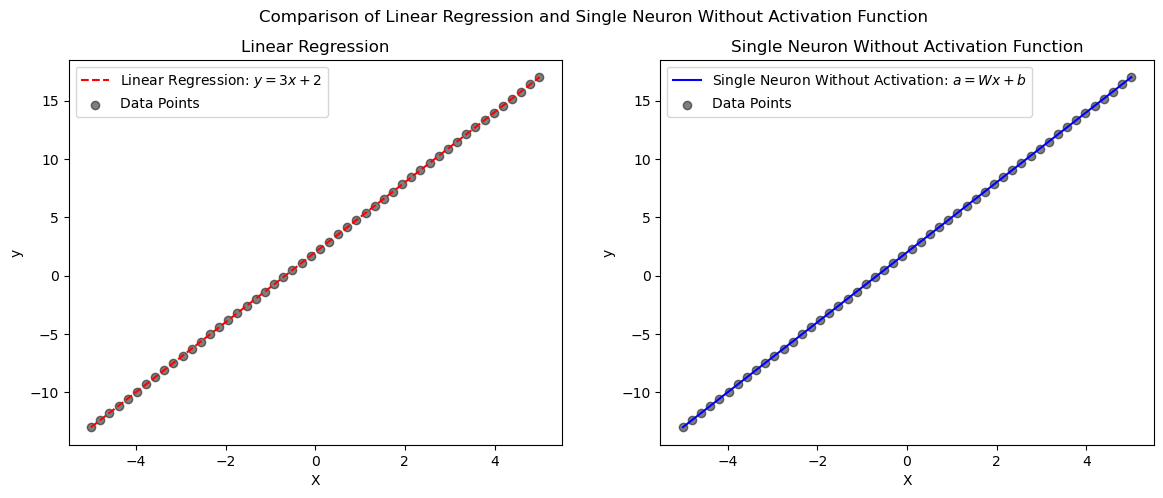

In [9]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Linear Regression
axs[0].plot(
    X,
    y_linear_reg,
    label="Linear Regression: $y = 3x + 2$",
    linestyle="dashed",
    color="red",
)
axs[0].scatter(X, y_linear_reg, label="Data Points", color="black", alpha=0.5)
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].set_title("Linear Regression")

# Plot Single Neuron Without Activation
axs[1].plot(
    X,
    y_pred,
    label="Single Neuron Without Activation: $a = Wx + b$",
    linestyle="solid",
    color="blue",
)
axs[1].scatter(X, y_pred, label="Data Points", color="black", alpha=0.5)
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")
axs[1].legend()
axs[1].set_title("Single Neuron Without Activation Function")

plt.suptitle(
    "Comparison of Linear Regression and Single Neuron Without Activation Function"
)
plt.show()

## Single Neuron With Activation Function
In this part, we examine a neural network with only one layer and neuron which has an activation function. In this example, we use the sigmoid activation function.

$$z^{(i)} = \vec{\mathbf{w}} \cdot \vec{\mathbf{x}}^{(i)} + b$$

$$f_{\vec{\mathbf{w}}, b}(\vec{\mathbf{x}}^{(i)}) = \sigma(z^{(i)}) $$


And:

$$f_{\vec{\mathbf{w}}, b}(\vec{\mathbf{x}}^{(i)}) = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$$



Let's create a synthetic dataset with predefined weights and bias and then compare the plot of the logistic regression model with the plot of the neural network model with single neuron with sigmoid activation function.

In [10]:
# Synthetic data
X_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

# Define model and set parameters manually
w_manual = 2.0
b_manual = -5.0

Let's manually calculate the logistic regression model's following the predefined weights and bias.

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Compute the logit
z = np.dot(X_train, w_manual) + b_manual

# Compute the sigmoid
y_logistic_reg = sigmoid(z)

Creating the neural network model with sigmoid activation function.

In [12]:
# Define the neural network model
class SingleNeuronSigmoidModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Single fully connected layer (Linear)
        self.linear = nn.Linear(in_features=1, out_features=1)

        # Sigmoid activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Linear Transformation, z = Wx + b
        logit = self.linear(x)

        # Apply Sigmoid Activation
        return self.sigmoid(logit)

In [13]:
model = SingleNeuronSigmoidModel()
print(model)

SingleNeuronSigmoidModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [14]:
model.linear.weight.data.fill_(w_manual)
model.linear.bias.data.fill_(b_manual)

print(f"w = {model.linear.weight.data}")
print(f"b = {model.linear.bias.data}")

w = tensor([[2.]])
b = tensor([-5.])


In [15]:
X_tensor = torch.tensor(X_train, dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred = model(X_tensor)

y_pred = y_pred.numpy()

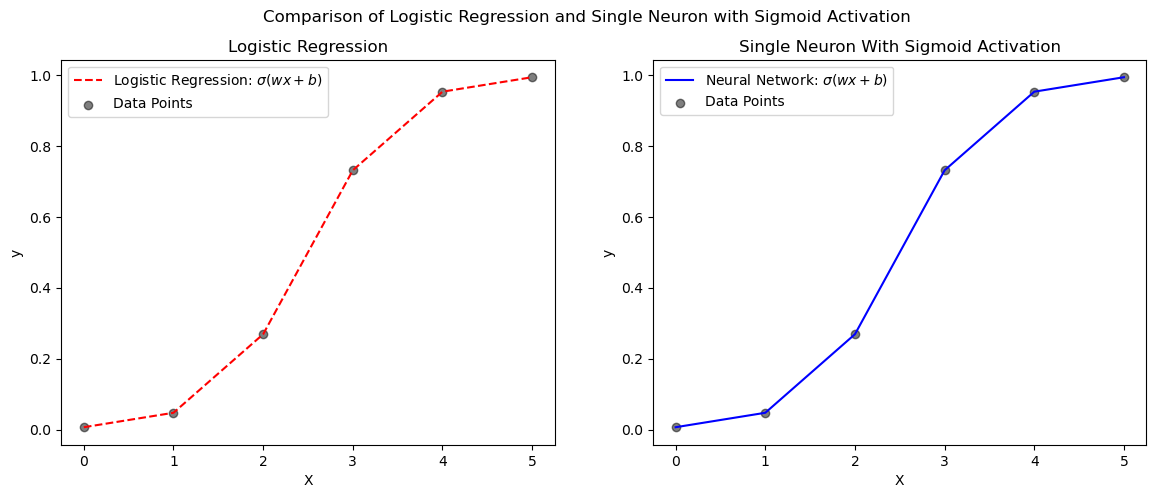

In [16]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Logistic Regression
axs[0].plot(
    X_train,
    y_logistic_reg,
    label=r"Logistic Regression: $\sigma(wx + b)$",
    linestyle="dashed",
    color="red",
)
axs[0].scatter(
    X_train, y_logistic_reg, label="Data Points", color="black", alpha=0.5
)
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].set_title("Logistic Regression")

# Plot Single Neuron With Sigmoid
axs[1].plot(
    X_train,
    y_pred,
    label=r"Neural Network: $\sigma(wx + b)$",
    linestyle="solid",
    color="blue",
)
axs[1].scatter(X_train, y_pred, label="Data Points", color="black", alpha=0.5)
axs[1].set_xlabel("X")
axs[1].set_ylabel("y")
axs[1].legend()
axs[1].set_title("Single Neuron With Sigmoid Activation")

plt.suptitle(
    "Comparison of Logistic Regression and Single Neuron with Sigmoid Activation"
)
plt.show()